# CAR PRICE PREDICTION USING PYTHON

##### importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ipywidgets import interact
from sklearn.tree import DecisionTreeClassifier

##### loading the requited dataset

In [34]:
data=pd.read_csv('cardata.csv')

In [35]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### displaying teh shape of the data

In [4]:
data.shape

(205, 26)

##### displaying the columns of the dataset

In [36]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##### displaying the data types of the dataset

In [37]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

##### checking if the data contains any null values

In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### checking if the data contains any duplicated values

In [38]:
data.duplicated().sum()

0

##### getting the description of the numerical columns of the dataset

In [39]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##### getting the avlue count of the number of doors that the cars have in the dataset

In [12]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

##### displaying a counplot for the fueltype of teh cars in the dataset

<AxesSubplot:xlabel='fueltype', ylabel='count'>

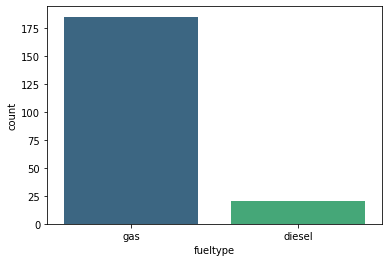

In [40]:
sns.countplot(x='fueltype',data=data,palette='viridis')

##### displaying a countplot that shows the count of the carbody of the cars in teh dataset

<AxesSubplot:xlabel='carbody', ylabel='count'>

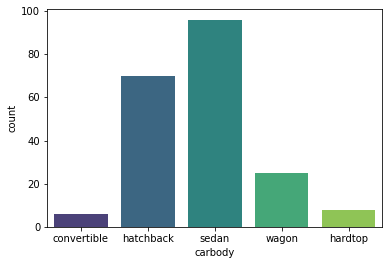

In [41]:
sns.countplot(x='carbody',data=data,palette='viridis')

##### mapping the object data type column to interger values for better analysis

In [13]:
data['carbody_label']=data['carbody'].map({'convertible':1,'hatchback':2,'sedan':3,'wagon':4,'hardtop':5})

##### creating a pie chart 

([<matplotlib.patches.Wedge at 0x1aa2fafe220>,
 [Text(-0.9278563546727964, 0.5908321124425365, 'std'),
  Text(0.9278563546727963, -0.5908321124425366, 'turbo')],
 [Text(-0.5061034661851617, 0.3222720613322926, '82.0%'),
  Text(0.5061034661851616, -0.32227206133229264, '18.0%')])

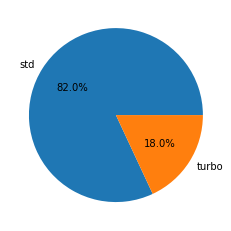

In [14]:
plt.pie(data['aspiration'].value_counts(),autopct='%1.1f%%',labels=data['aspiration'].unique())

##### mapping the engine location column to integer value

In [42]:
data['enginelabel']=data['enginelocation'].map({'front':1,'rear':2})

##### displaying a boxplot of the price and the carbody in the dataset

<AxesSubplot:xlabel='carbody', ylabel='price'>

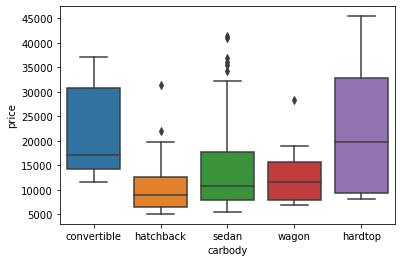

In [43]:
sns.boxplot(x=data['carbody'],y=data['price'])

##### creating an interactive scatter plot as per the parameters selected by the user

In [44]:
@interact(column=['carlength','carwidth','carheight','curbweight'])
def analysis(column):
    if column=='carlength':
        sns.scatterplot(x=data['carlength'],y=data['price'])
    if column=='carwidth':
        sns.scatterplot(x=data['carwidth'],y=data['price'])
    if column=='carheight':
        sns.scatterplot(x=data['carheight'],y=data['price'])
    if column=='curbweight':
        sns.scatterplot(x=data['curbweight'],y=data['price'])
    

interactive(children=(Dropdown(description='column', options=('carlength', 'carwidth', 'carheight', 'curbweigh…

### MODEL CREATION

##### generating dependent and independent variables

In [22]:
x=data[['citympg','horsepower','highwaympg','carlength','carwidth','carwidth','curbweight','carbody_label','enginelabel']]

In [23]:
y=data['price']

##### splitting the data into training and testing set

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [25]:
lr=LinearRegression()

In [26]:
dtc=DecisionTreeClassifier()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
p=lr.predict(x_test)

In [29]:
mba=mean_absolute_error(y_test,p)

In [30]:
msa=mean_squared_error(y_test,p)

In [32]:
r2=r2_score(y_test,p)

In [33]:
print('The Mean Absolute Score of the Linear Regression model is : ',mba)
print('The Mean Squared Score of the Linear Regression model is : ',msa)
print('The r2 Score of the Linear Regression model is : ',r2)

The Mean Absolute Score of the Linear Regression model is :  2730.2074502506766
The Mean Squared Score of the Linear Regression model is :  14764851.096429598
The r2 Score of the Linear Regression model is :  0.8212846593808221
